In [190]:
import warnings
warnings.filterwarnings("ignore")  # Ignore all warnings

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import ttest_ind, f_oneway, chi2_contingency, shapiro, levene, kruskal, kstest

In [192]:
!pip install pingouin
import pingouin as pg

### Problem Statement & EDA

Yulu, a leading micro-mobility service provider in India, has experienced a significant decline in revenue. To address this issue, the company seeks to analyze the factors influencing the demand for shared electric cycles in the Indian market. The goal is to identify key variables that impact demand and evaluate their effectiveness in predicting rental patterns.

In [193]:
# Load Dataset
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089")

In [194]:
# Display first few rows
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [195]:
# (Rows, Columns)
df.shape

(10886, 12)

In [196]:
# Checking Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [197]:
# Extracting Year and month from datetime column and then deleting datetime
df["datetime"] = pd.to_datetime(df["datetime"])
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month

In [198]:
# remove column
df = df.drop(columns = ["datetime"])

In [199]:
df["year"].value_counts()

,count
year,
2012,5464
2011,5422


In [200]:
df["month"].value_counts()

,count
month,
8,912
7,912
6,912
5,912
12,912
10,911
11,911
4,909
9,909


In [201]:
# Check for null values
df.isnull().sum()

,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0
registered,0


In [202]:
# Summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


In [203]:
df.duplicated().sum()

np.int64(19)

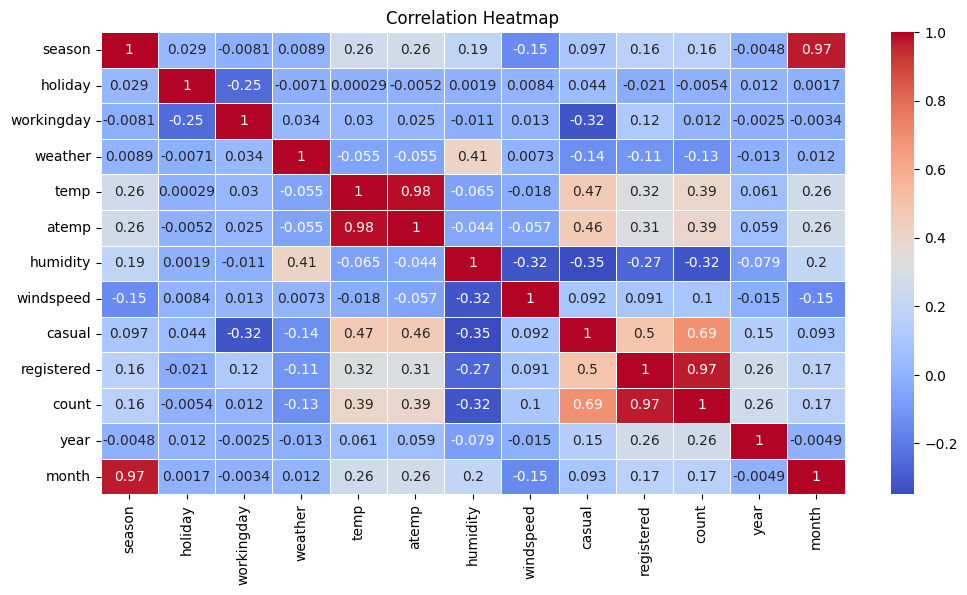

In [204]:
# 2. Establishing Relationship between Dependent and Independent Variables
## i. Plot a Correlation Heatmap and draw insights

plt.figure(figsize=(12, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [189]:
## ii. Remove highly correlated variables
# Identify variables with high correlation (above 0.85 threshold)
high_corr_vars = set()
threshold = 0.85
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            high_corr_vars.add(colname)

# Drop highly correlated variables
df_independentVars = df.drop(columns=high_corr_vars)
print(f"Highly correlated variables: {high_corr_vars}")

Highly correlated variables: {'month', 'count', 'atemp'}


In [205]:
# Convert categorical columns to category dtype
df['season'] = df['season'].astype('category')
df['weather'] = df['weather'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['workingday'] = df['workingday'].astype('category')

### Variate Analysis

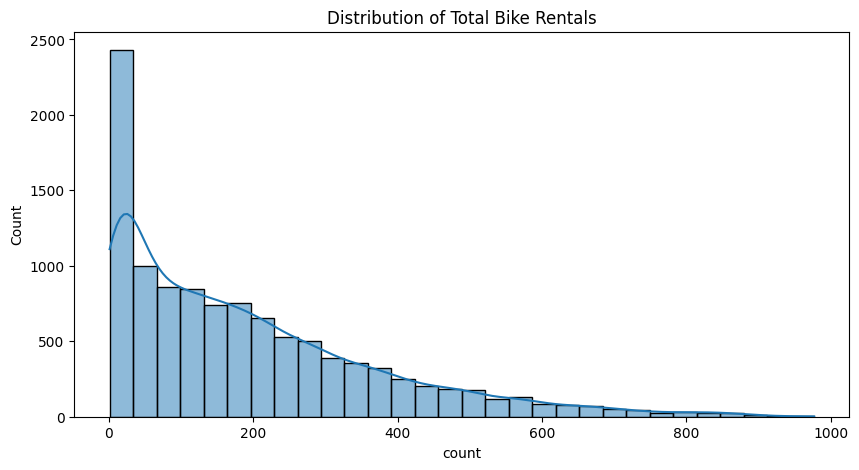

In [206]:
plt.figure(figsize=(10, 5))
sns.histplot(df['count'], bins=30, kde=True)
plt.title('Distribution of Total Bike Rentals')
plt.show()

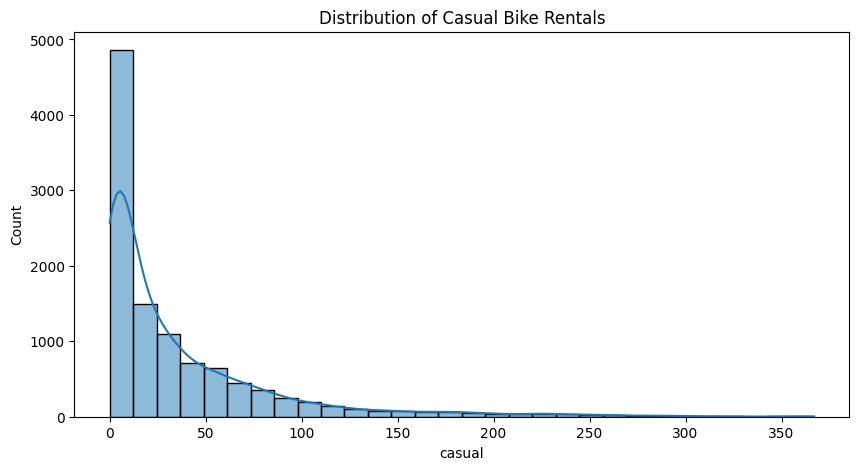

In [207]:
plt.figure(figsize=(10, 5))
sns.histplot(df['casual'], bins=30, kde=True)
plt.title('Distribution of Casual Bike Rentals')
plt.show()

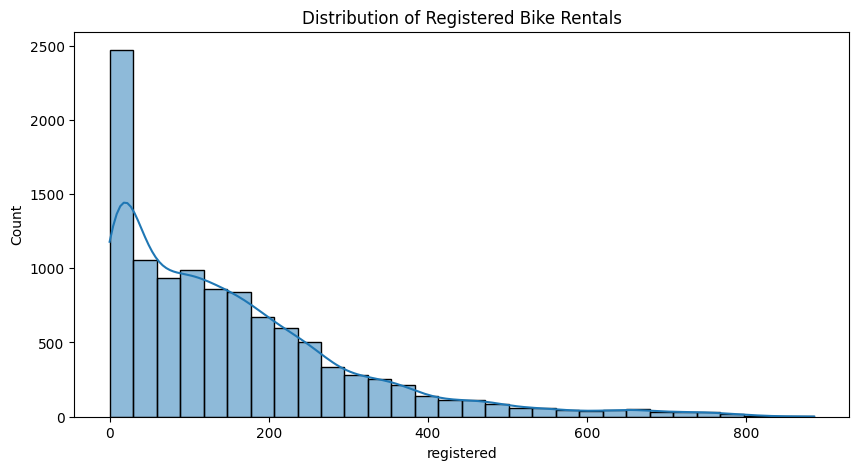

In [208]:
plt.figure(figsize=(10, 5))
sns.histplot(df['registered'], bins=30, kde=True)
plt.title('Distribution of Registered Bike Rentals')
plt.show()

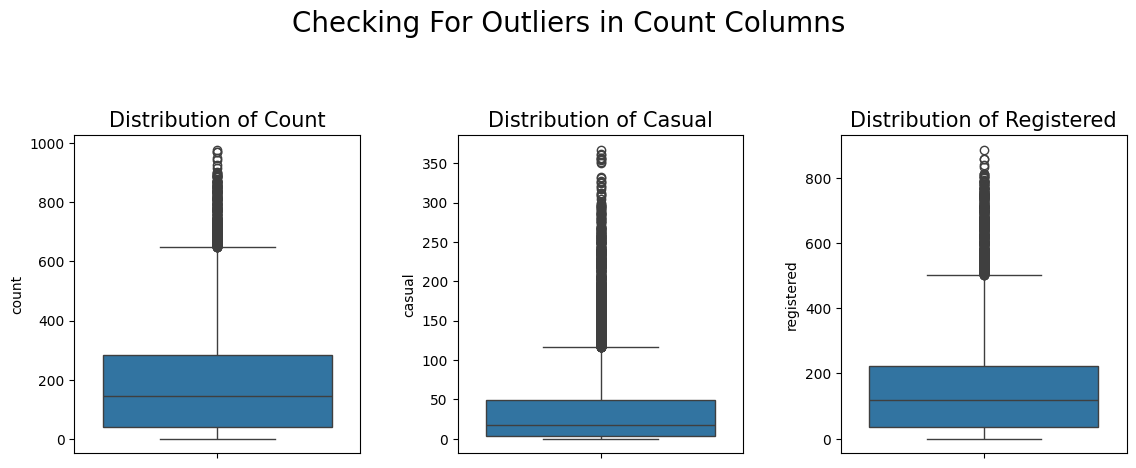

In [209]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

sns.boxplot(y=df['count'], ax=axes[0])
sns.boxplot(y=df['casual'], ax=axes[1])
sns.boxplot(y=df['registered'],ax=axes[2])


plt.suptitle("Checking For Outliers in Count Columns",fontsize = 20)
axes[0].set_title("Distribution of Count",fontsize = 15)
axes[1].set_title("Distribution of Casual",fontsize = 15)
axes[2].set_title("Distribution of Registered",fontsize = 15)


plt.tight_layout(pad=3)
plt.show()

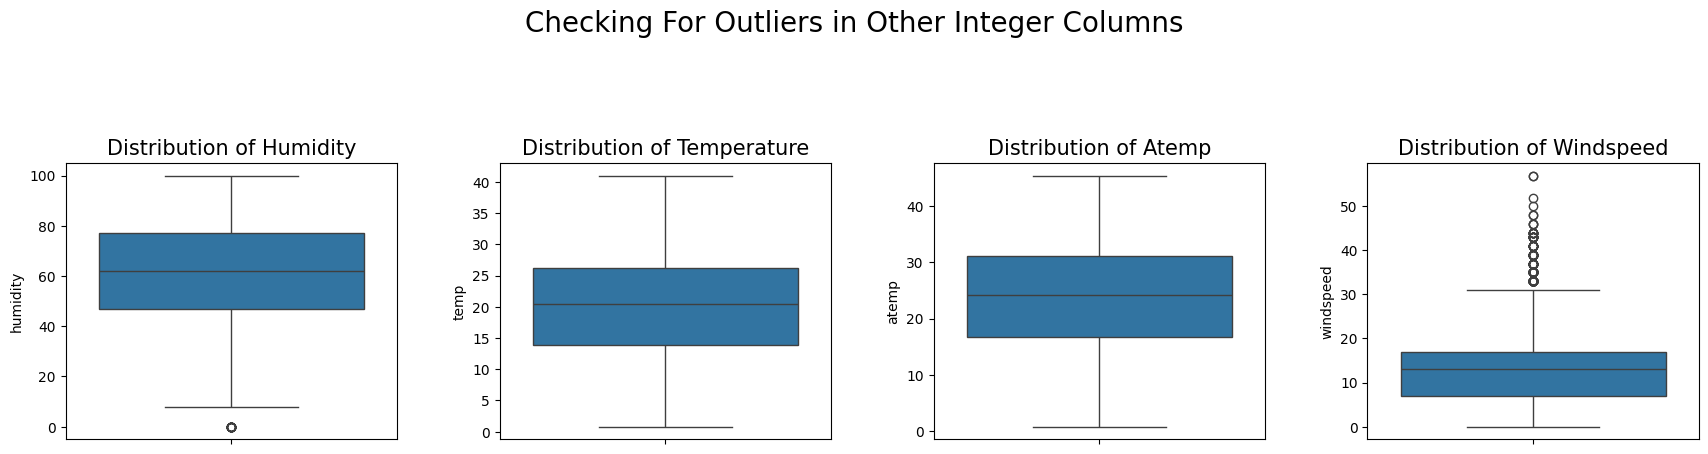

In [210]:
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

sns.boxplot(y=df['humidity'], ax=axes[0])
sns.boxplot(y=df['temp'], ax=axes[1])
sns.boxplot(y=df['atemp'],ax=axes[2])
sns.boxplot(y=df['windspeed'], ax=axes[3])

plt.suptitle("Checking For Outliers in Other Integer Columns",fontsize = 20)
axes[0].set_title("Distribution of Humidity",fontsize = 15)
axes[1].set_title("Distribution of Temperature",fontsize = 15)
axes[2].set_title("Distribution of Atemp",fontsize = 15)
axes[3].set_title("Distribution of Windspeed",fontsize = 15)

plt.tight_layout(pad=4)
plt.show()

There are some outliers in the columns **[Humidity, Windspeed, Count, Casual, and Registered]**. However, these outliers appear to be meaningful and do not seem to negatively impact future insights. Therefore, we will proceed with the analysis while keeping them. If necessary, we may consider removing them later.

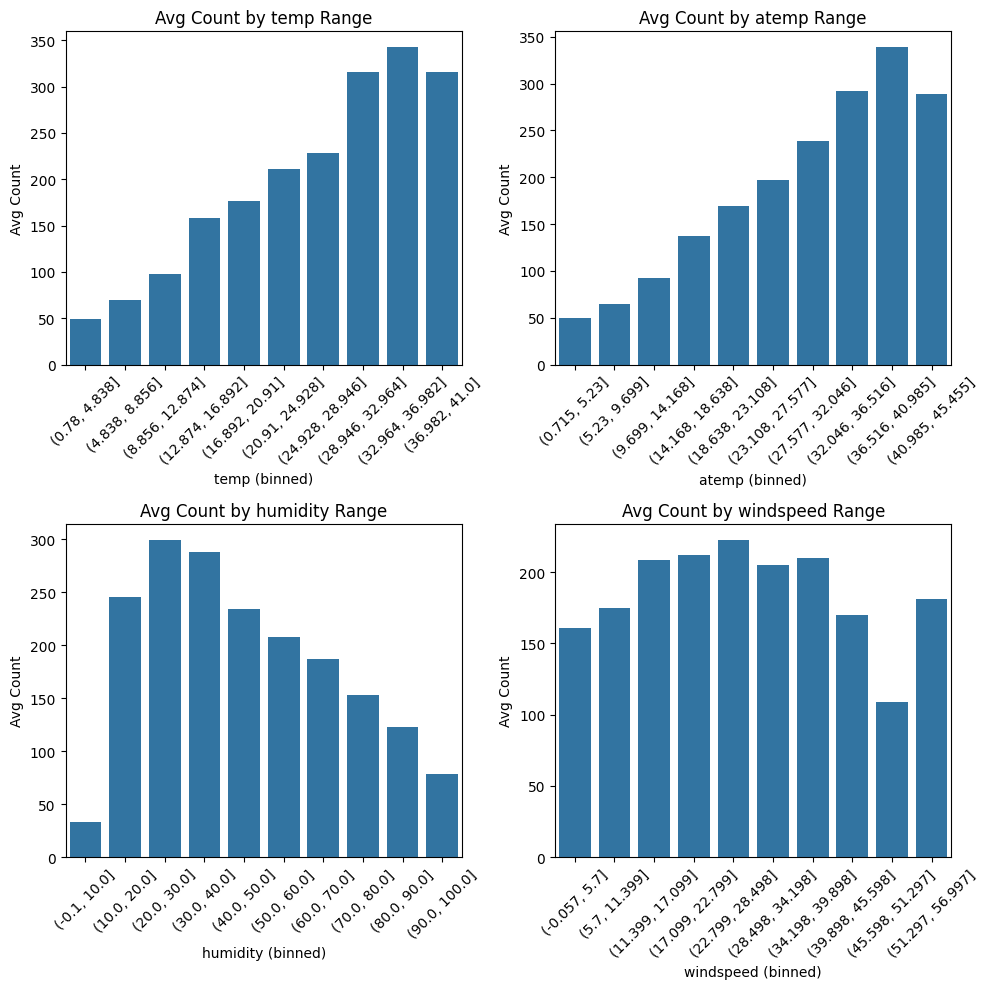

In [211]:
def plot_binned_avg_count(df, columns, n_bins=10):

    # Plots bar charts showing the average count of bike rentals for different binned ranges of continuous variables.

    n_cols = 2  # Number of columns in the plot grid
    n_rows = (len(columns) + 1) // n_cols  # Calculate required rows

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, n_rows * 5))  # Create subplots
    axes = axes.flatten()  # Flatten axes array for easy indexing

    for i, col in enumerate(columns):
        # Create bins for the continuous variable
        df['bin'] = pd.cut(df[col], bins=n_bins)

        # Calculate the average count for each bin
        binned_avg = df.groupby('bin')['count'].mean().reset_index()

        # Plot the binned data
        sns.barplot(x='bin', y='count', data=binned_avg, ax=axes[i])

        # Set plot titles and labels
        axes[i].set_title(f"Avg Count by {col} Range")
        axes[i].set_xlabel(f"{col} (binned)")
        axes[i].set_ylabel("Avg Count")
        axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

# Call function
continuous = ["temp", "atemp", "humidity", "windspeed"]
plot_binned_avg_count(df, continuous, n_bins=10)


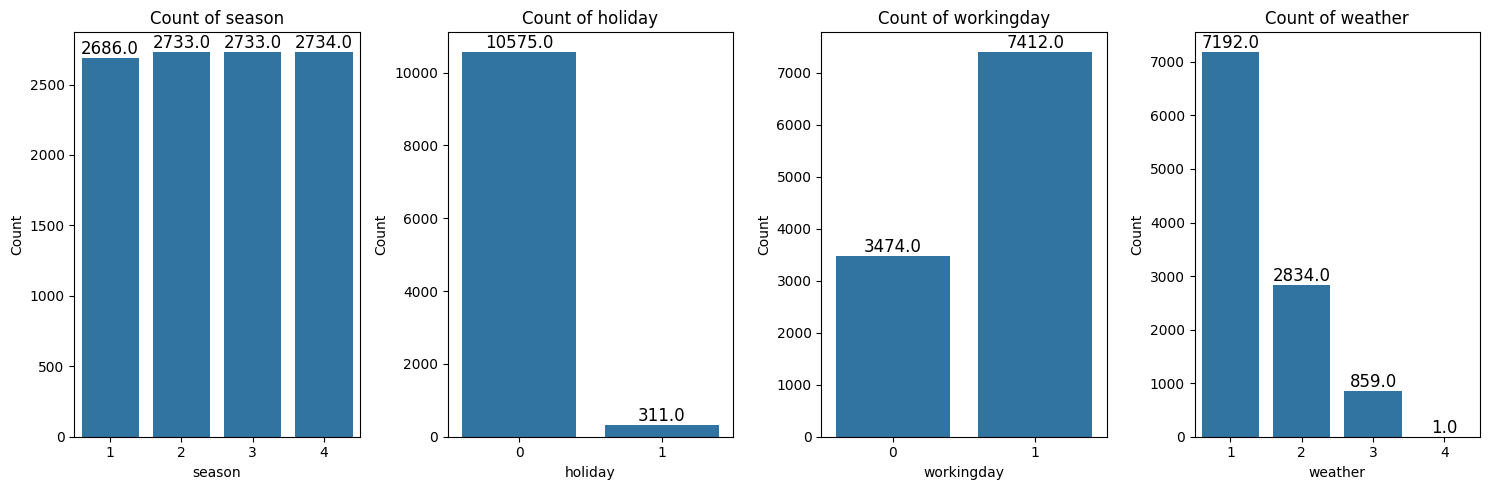

In [212]:
def plot_categorical_counts(df, columns):

    # Plots bar charts for categorical columns with value counts and displays values on top of each bar.

    n_cols = 4  # Number of columns in the plot grid
    n_rows = (len(columns) + 1) // n_cols  # Calculate required rows

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))  # Create subplots
    axes = axes.flatten()  # Flatten axes array for easy indexing

    for i, col in enumerate(columns):
        ax = sns.barplot(x=df[col].value_counts().index,
                         y=df[col].value_counts().values,
                         ax=axes[i])

        # Set titles and labels
        axes[i].set_title(f"Count of {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Count")
        axes[i].tick_params(axis='x', rotation=0)  # Rotate x-axis labels if needed

        # Add value labels on top of bars
        for p in ax.patches:
            axes[i].annotate(f"{p.get_height()}",
                             (p.get_x() + p.get_width() / 2, p.get_height()),
                             ha='center', va='bottom', fontsize=12)

    # Hide unused subplots if any
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

# Example usage
categorical_cols = ["season", "holiday", "workingday", "weather"]
plot_categorical_counts(df, categorical_cols)


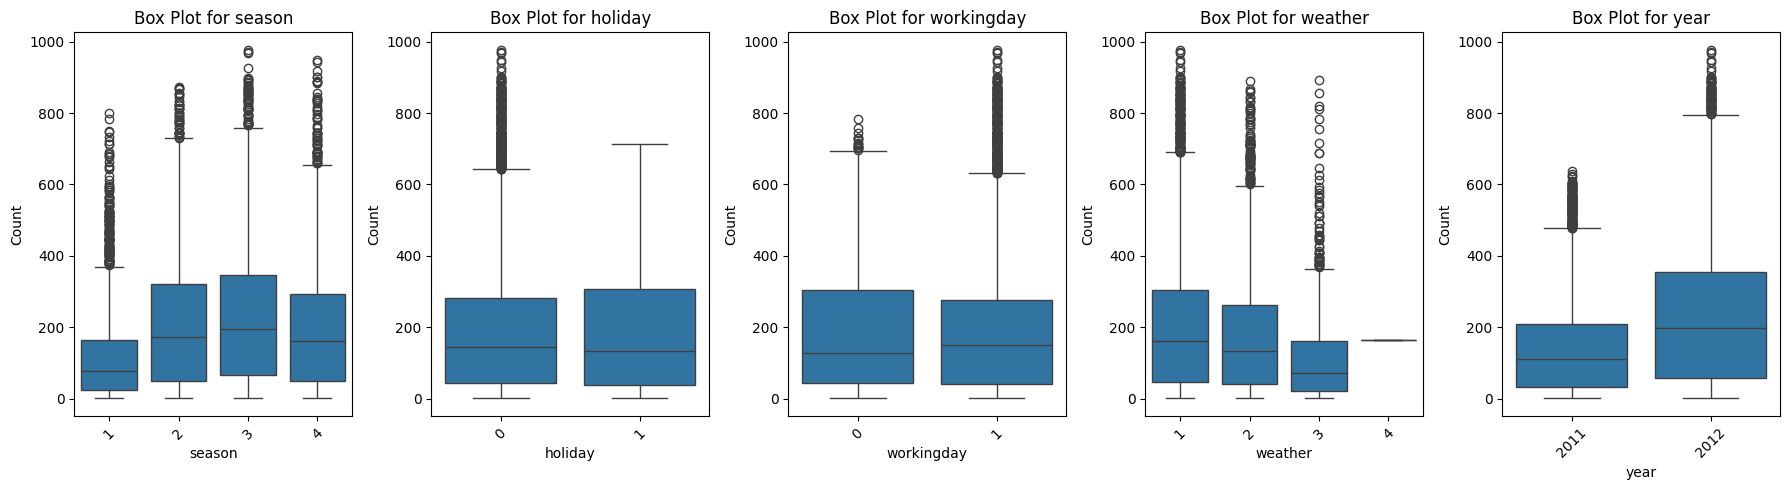

In [213]:
def plot_categorical_boxplots(df, columns):
    """
    Plots box plots for categorical columns against the 'count' variable.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    columns (list): List of categorical columns to plot.
    """
    n_cols = 5  # Number of columns per row
    n_rows = (len(columns) + 1) // n_cols  # Calculate required rows

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))  # Create subplots
    axes = axes.flatten()  # Flatten axes array for easy indexing

    for i, col in enumerate(columns):
        sns.boxplot(data=df, x=col, y="count", ax=axes[i])

        # Set titles and labels
        axes[i].set_title(f"Box Plot for {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Count")
        axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels if needed

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

# Example usage
categorical_cols = ["season", "holiday", "workingday", "weather", "year"]
plot_categorical_boxplots(df, categorical_cols)


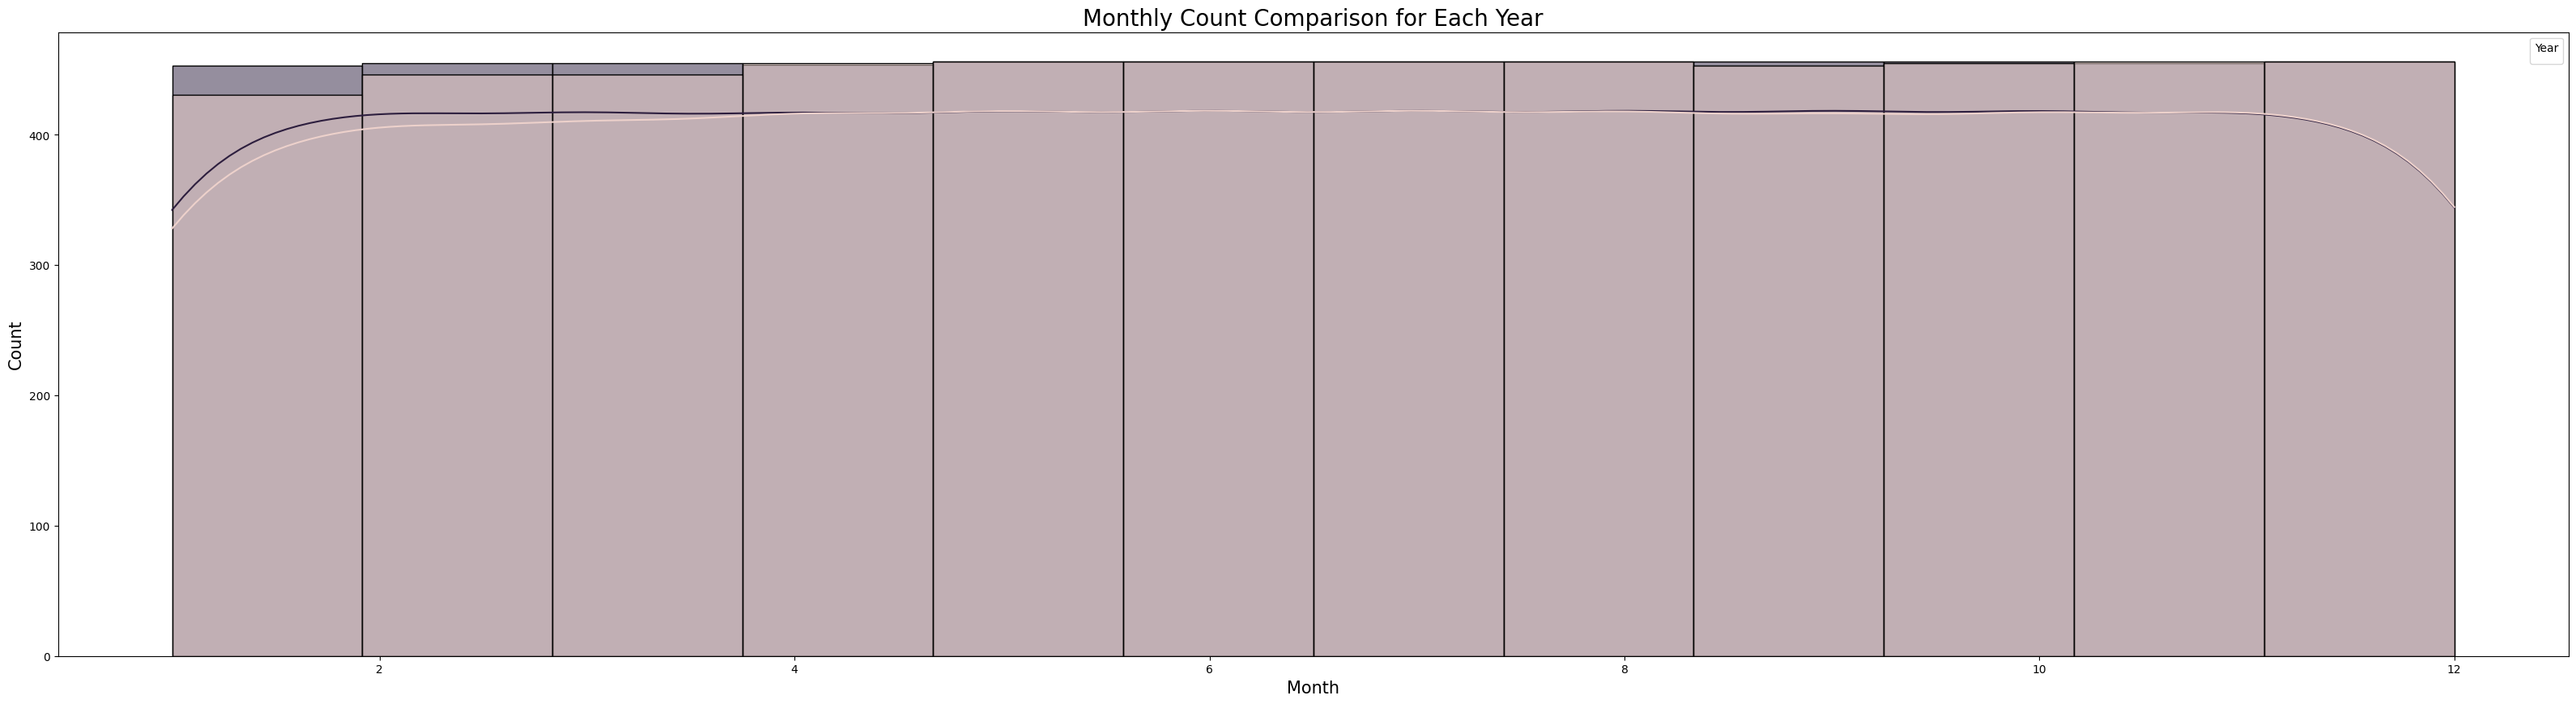

In [214]:
plt.figure(figsize=(40, 10))
sns.histplot(data=df, x='month', hue=df["year"], bins=12,kde = True)
plt.xlabel('Month',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.title('Monthly Count Comparison for Each Year',fontsize = 20)
plt.legend(title='Year')
plt.show()

### Summary - Exploratory Data Analysis (EDA)

#### Univariate

#### Histogram (Histplot):
1. The distribution of rental counts across months is quite similar for both years (2011 & 2012), with no significant difference.

#### Categorical Plot (Catplot):
1. In 2011, most user counts range between **0-200**, whereas in 2012, the counts extend up to **400**.  
2. **Weather Condition 4** (Heavy Rain, Ice Pellets, Thunderstorm, Mist, Snow, Fog) has very few data points, with a count of just **1**.  
3. **Weather Conditions 1 (Clear), 2 (Mist), and 3 (Light Snow)** show an average user count between **0-300 or 350**, while the highest counts (up to **1000**) are observed in **Weather Condition 1 (Clear, Few Clouds, Partly Cloudy)**.  
4. **Working Day Analysis**:  
   - User counts on working days are quite similar to weekends.  
   - However, the highest recorded user count occurs on a working day.  
5. **Holiday Column Observation**:  
   - The holiday column does not seem to have a strong influence on bike rentals. Further analysis is required to validate its significance.  
6. **Seasonal Trends**:  
   - **Spring (Season 1)** has a user count predominantly between **1-170 or 180**.  
   - **Summer (Season 2), Fall (Season 3), and Winter (Season 4)** generally have user counts between **1-300 or 350**.  

#### Bar Plot Analysis:
1. **Windspeed**: The highest average user count is observed in the **22.7 - 28.9** range.  
2. **Humidity**: The **20% - 30%** range sees the highest number of users.  
3. **Apparent Temperature (aTemp)**: The range **36.5 - 40.9°C** has the highest average user count.  
4. **Temperature (temp)**: The **moderate temperature range (32.9 - 36.9°C)** records the highest number of users.  

### Relationship Between Dependent and Independent Variables  

Rather than using the **count** column, we will analyze the **casual** and **registered** columns separately to gain deeper insights, as **count = casual + registered**.  

- **Dependent Variables**: `['casual', 'registered']`  
- **Independent Variables**: `['temp', 'atemp', 'humidity', 'workingday', 'season', 'weather', 'month']`

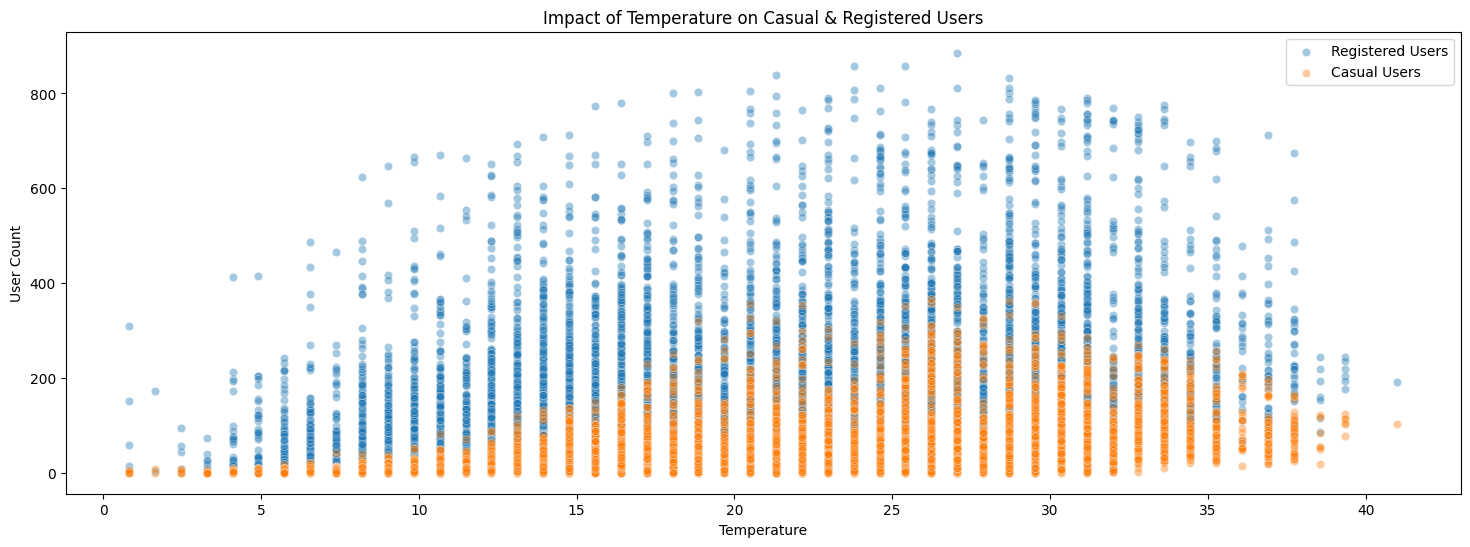

In [215]:
# Scatter plot showing the difference between casual and registered users with respect to temperature
plt.figure(figsize=(18, 6))

sns.scatterplot(data=df, x="temp", y="registered", label="Registered Users", alpha=0.4)
sns.scatterplot(data=df, x="temp", y="casual", label="Casual Users", alpha=0.4)

plt.xlabel('Temperature')
plt.ylabel('User Count')
plt.title('Impact of Temperature on Casual & Registered Users')
plt.legend()
plt.show()


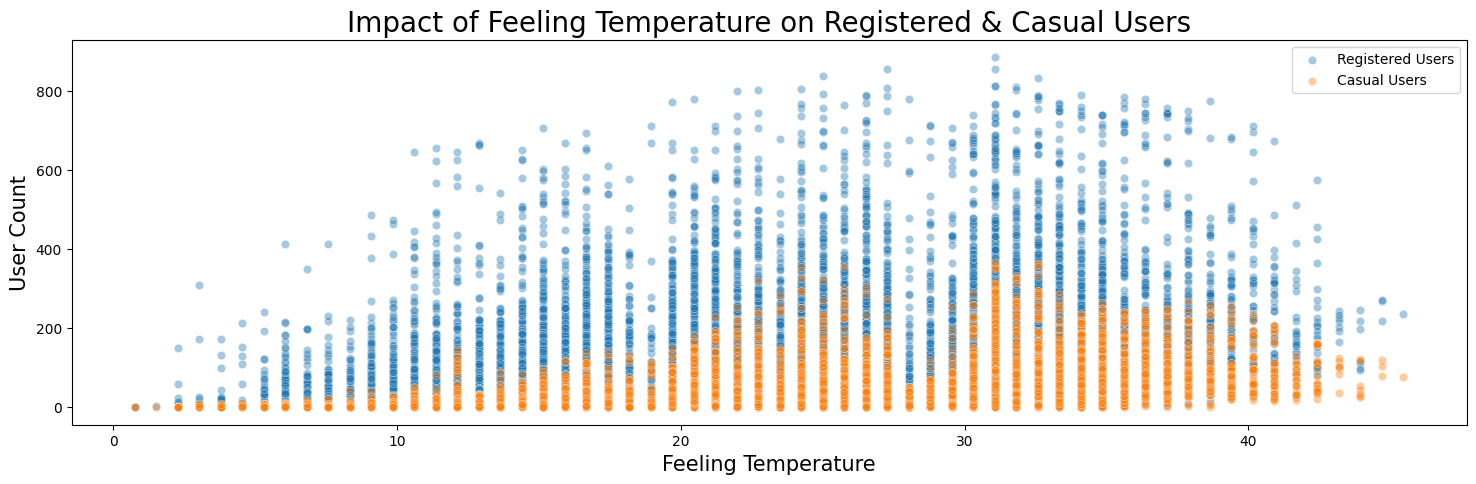

In [216]:
# Scatter plot showing the difference between casual and registered users with respect to feeling temperature
plt.figure(figsize=(18, 5))

sns.scatterplot(data=df, x="atemp", y="registered", label="Registered Users", alpha=0.4)
sns.scatterplot(data=df, x="atemp", y="casual", label="Casual Users", alpha=0.4)

plt.title("Impact of Feeling Temperature on Registered & Casual Users", fontsize=20)
plt.xlabel("Feeling Temperature", fontsize=15)
plt.ylabel("User Count", fontsize=15)
plt.legend()
plt.show()


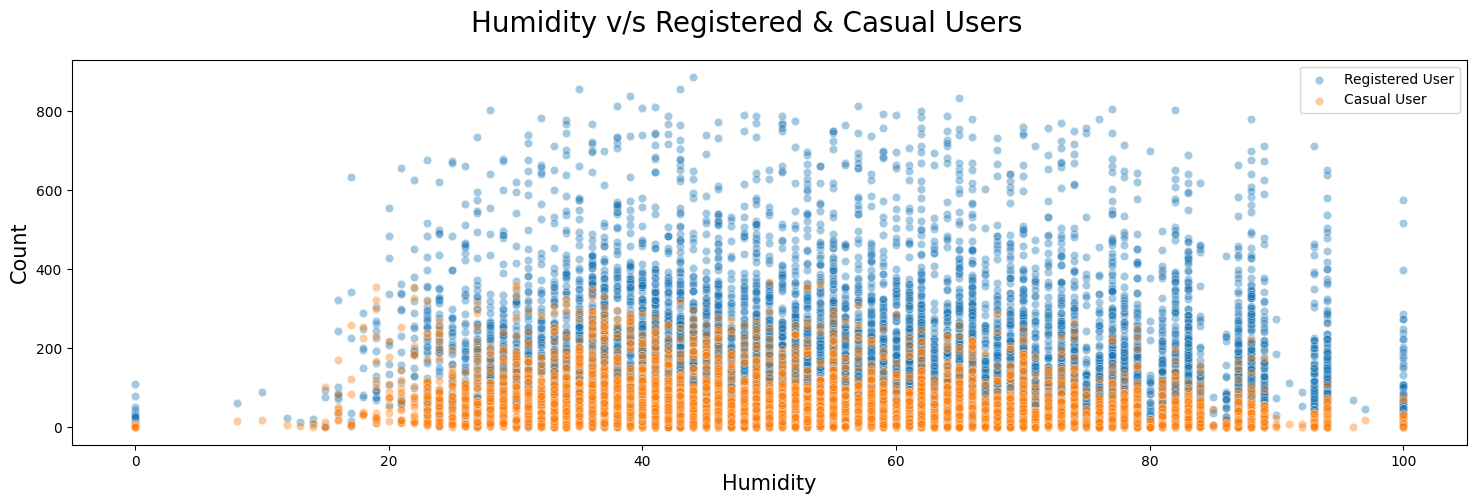

In [217]:
# Scatter plot showing the difference between casual and registered users with respect to humidity
plt.figure(figsize = (18,5))

sns.scatterplot(x = "humidity",y = "registered",data = df, label = "Registered User", alpha = 0.4)
sns.scatterplot(x = "humidity",y = "casual",data = df, label = "Casual User", alpha = 0.4)

plt.suptitle("Humidity v/s Registered & Casual Users",fontsize = 20)
plt.xlabel("Humidity",fontsize= 15)
plt.ylabel("Count",fontsize= 15)
plt.show()

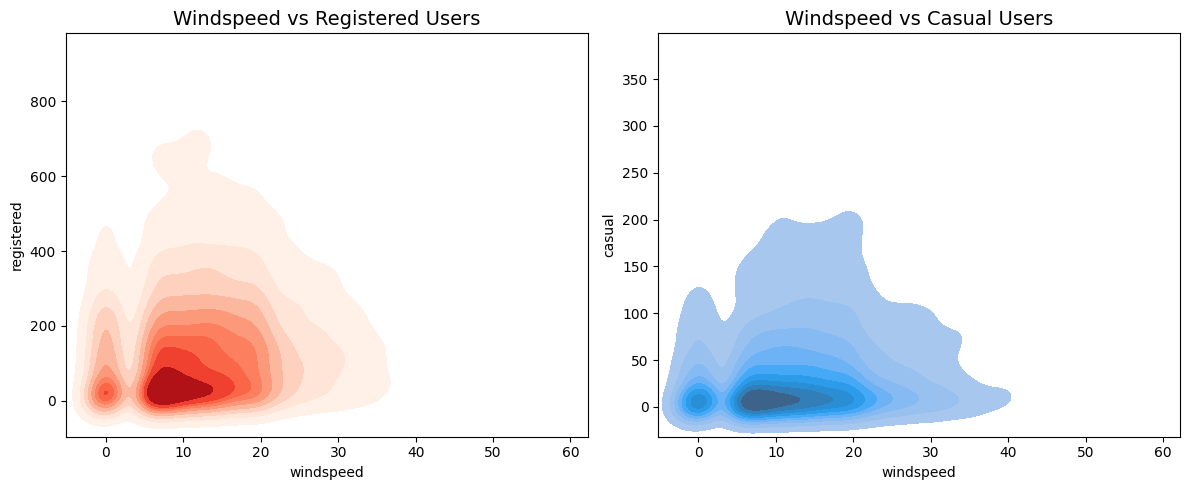

In [165]:
# KDE plots showing the relationship between windspeed and user type
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.kdeplot(data=df, x="windspeed", y="registered", fill=True, cmap='Reds', ax=axes[0])
sns.kdeplot(data=df, x="windspeed", y="casual", fill=True, ax=axes[1])

# Set titles and labels
axes[0].set_title("Windspeed vs Registered Users", fontsize=14)
axes[1].set_title("Windspeed vs Casual Users", fontsize=14)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


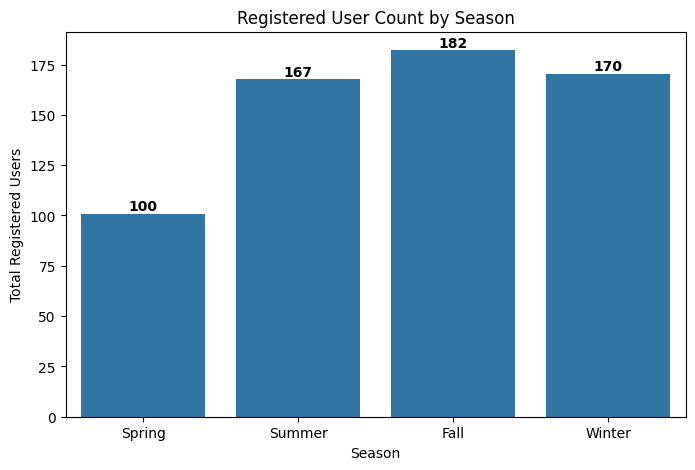

In [166]:
# Count of Registered Users WRT Season
season_map = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=df, x="season", y="registered", errorbar=None,)

# Set season labels
ax.set_xticklabels([season_map[i] for i in df["season"].unique()])

# Annotate bars with total counts
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height(),
            f"{int(p.get_height())}",  # Convert to integer for clarity
            ha="center", va="bottom", fontsize=10, fontweight="bold")

# Labels and title
plt.xlabel("Season")
plt.ylabel("Total Registered Users")
plt.title("Registered User Count by Season")

plt.show()


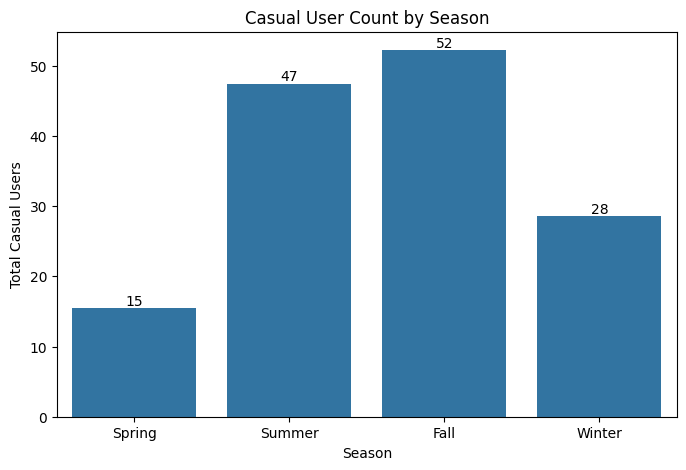

In [167]:
# Count of Casual Users WRT Season
season_map = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=df, x="season", y="casual", errorbar=None)

# Set season labels
ax.set_xticklabels([season_map[i] for i in df["season"].unique()])

# Annotate bars with total counts
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height(),
            f"{int(p.get_height())}",  # Convert to integer for clarity
            ha="center", va="bottom")

# Labels and title
plt.xlabel("Season")
plt.ylabel("Total Casual Users")
plt.title("Casual User Count by Season")

plt.show()


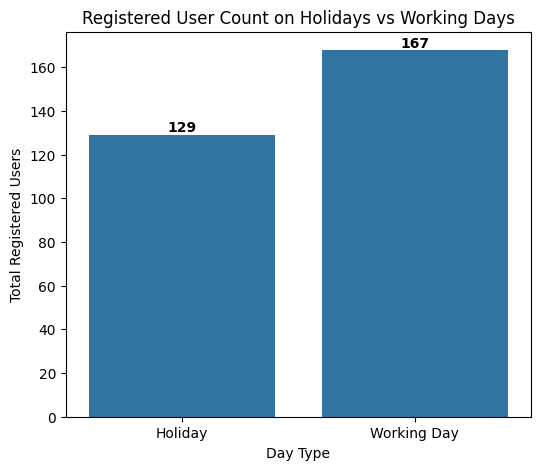

In [168]:
# Count of Registered Users on Holidays vs Working Days
work_map = {0: "Holiday", 1: "Working Day"}

plt.figure(figsize=(6, 5))
ax = sns.barplot(data=df, x="workingday", y="registered", errorbar=None)

# Set x-axis labels
ax.set_xticklabels([work_map[i] for i in df["workingday"].unique()])

# Annotate bars with total counts
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height(),
            f"{int(p.get_height())}",  # Convert to integer for clarity
            ha="center", va="bottom", fontsize=10, fontweight="bold")

# Labels and title
plt.xlabel("Day Type")
plt.ylabel("Total Registered Users")
plt.title("Registered User Count on Holidays vs Working Days")

plt.show()


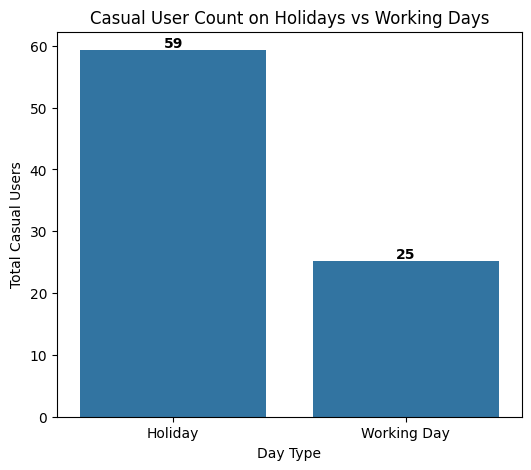

In [169]:
# Count of Casual Users on Holidays vs Working Days
work_map = {0: "Holiday", 1: "Working Day"}

plt.figure(figsize=(6, 5))
ax = sns.barplot(data=df, x="workingday", y="casual", errorbar=None)

# Set x-axis labels
ax.set_xticklabels([work_map[i] for i in df["workingday"].unique()])

# Annotate bars with total counts
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height(),
            f"{int(p.get_height())}",  # Convert to integer for clarity
            ha="center", va="bottom", fontsize=10, fontweight="bold")

# Labels and title
plt.xlabel("Day Type")
plt.ylabel("Total Casual Users")
plt.title("Casual User Count on Holidays vs Working Days")

plt.show()

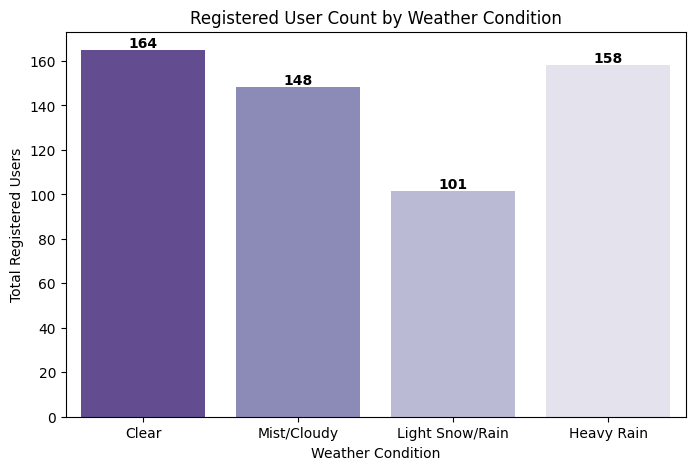

In [170]:
# Count of Registered Users with Respect to Weather Conditions
weather_map = {1: "Clear", 2: "Mist/Cloudy", 3: "Light Snow/Rain", 4: "Heavy Rain"}

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=df, x="weather", y="registered", errorbar=None, palette="Purples_r")

# Set weather condition labels
ax.set_xticklabels([weather_map[i] for i in df["weather"].unique()])

# Annotate bars with total counts
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height(),
            f"{int(p.get_height())}",  # Convert to integer for clarity
            ha="center", va="bottom", fontsize=10, fontweight="bold")

# Labels and title
plt.xlabel("Weather Condition")
plt.ylabel("Total Registered Users")
plt.title("Registered User Count by Weather Condition")

plt.show()


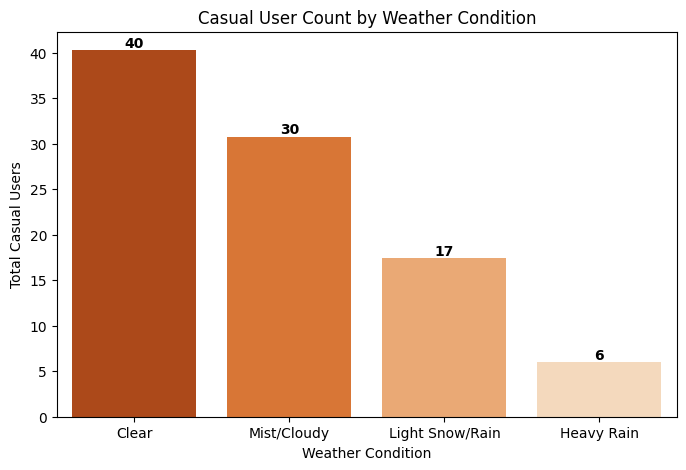

In [171]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=df, x="weather", y="casual", errorbar=None, palette="Oranges_r")

# Set weather condition labels
ax.set_xticklabels([weather_map[i] for i in df["weather"].unique()])

# Annotate bars with total counts
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height(),
            f"{int(p.get_height())}",  # Convert to integer for clarity
            ha="center", va="bottom", fontsize=10, fontweight="bold")

# Labels and title
plt.xlabel("Weather Condition")
plt.ylabel("Total Casual Users")
plt.title("Casual User Count by Weather Condition")

plt.show()

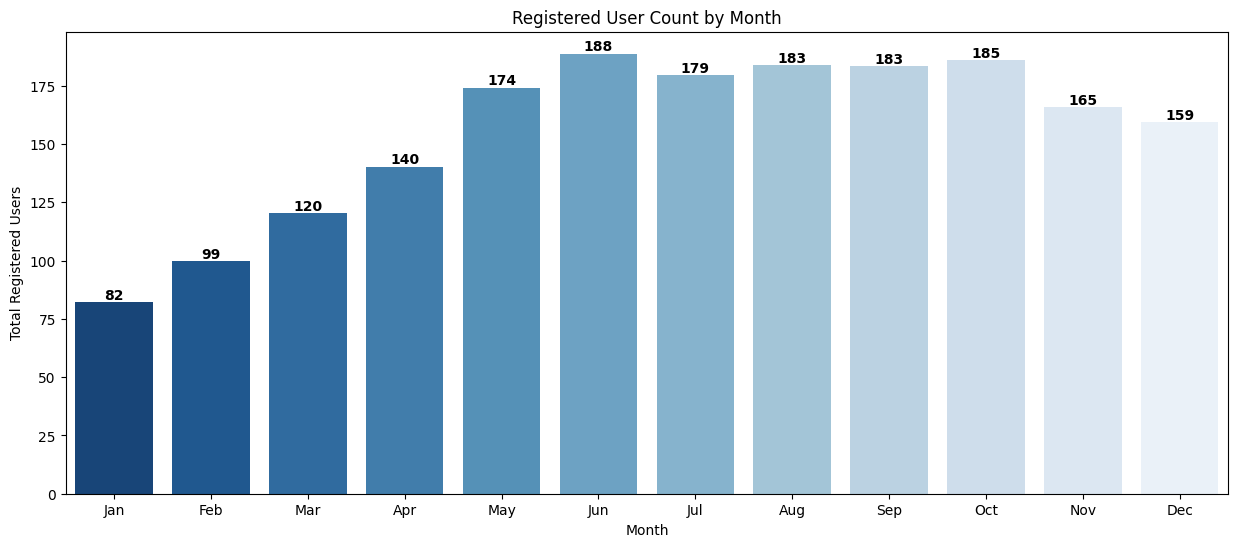

In [172]:
import calendar

# Map month numbers to month names
month_mapping = {i: calendar.month_abbr[i] for i in range(1, 13)}

plt.figure(figsize=(15, 6))
ax = sns.barplot(data=df, x="month", y="registered", errorbar=None, palette="Blues_r")

# Set month labels
ax.set_xticklabels([month_mapping[i] for i in df["month"].unique()])

# Annotate bars with total counts
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height(),
            f"{int(p.get_height())}",  # Convert to integer for clarity
            ha="center", va="bottom", fontsize=10, fontweight="bold")

# Labels and title
plt.xlabel("Month")
plt.ylabel("Total Registered Users")
plt.title("Registered User Count by Month")

plt.show()


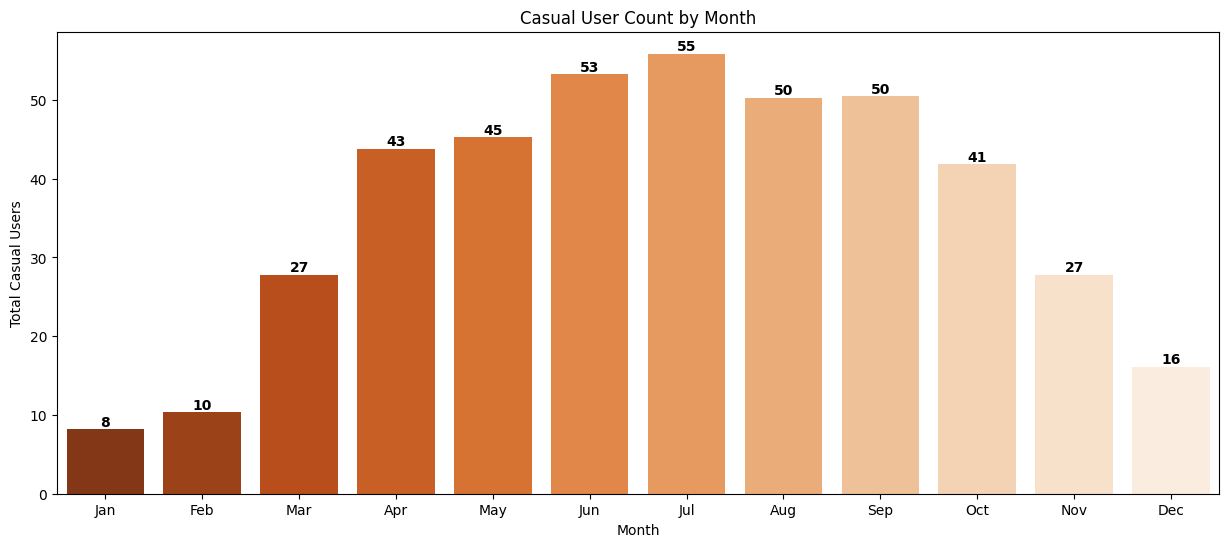

In [173]:
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=df, x="month", y="casual", errorbar=None, palette="Oranges_r")

# Set month labels
ax.set_xticklabels([month_mapping[i] for i in df["month"].unique()])

# Annotate bars with total counts
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height(),
            f"{int(p.get_height())}",  # Convert to integer for clarity
            ha="center", va="bottom", fontsize=10, fontweight="bold")

# Labels and title
plt.xlabel("Month")
plt.ylabel("Total Casual Users")
plt.title("Casual User Count by Month")

plt.show()

### **Analysis with Respect to Casual and Registered Users**  

#### **Scatter Plot Analysis:**  
1. **Temperature & Apparent Temperature (atemp):**  
   - Shows the distribution of **casual** and **registered** users across different temperature ranges.  
   - Users are more concentrated in specific temperature ranges.  

2. **Humidity:**  
   - The **number of casual and registered users is highest when humidity is between 20% - 60%**.  
   - Beyond this range, user count decreases.  

#### **KDE Plot Analysis:**  
1. **Windspeed:**  
   - **Darker regions** indicate higher user concentrations.  
   - **Most users are present when wind speed is between 10 - 20 km/h**.  

#### **Bar Plot Analysis:**  
1. **Working Day:**  
   - **Registered user count is higher on working days (weekdays).**  
   - **Casual user count is higher on holidays and weekends.**  

2. **Weather Conditions:**  
   - The **number of casual and registered users is highest when the weather is clear or cloudy**.  
   - User count **drops significantly** in light or heavy rain/snow.  

3. **Monthly Trends:**  
   - **Casual user count is highest between April and October.**  
   - **Registered user count increases from April onwards.**  

### **Significant Variables for Predicting the Demand for Shared Electric Cycles in the Indian Market ?**  

**Answer:** `season`, `weather`, `workingday`, `windspeed`, `temp` and `atemp` are key factors influencing demand.

### Hypothesis Testing @ 0.05 Significance Level

In [174]:
## 1. Two-Sample T-Test: Effect of Working Days on Bike Rentals
working_day_rentals = df[df['workingday'] == 1]['count']
non_working_day_rentals = df[df['workingday'] == 0]['count']

# H0: No difference in rentals between working and non-working days
# H1: Difference exists

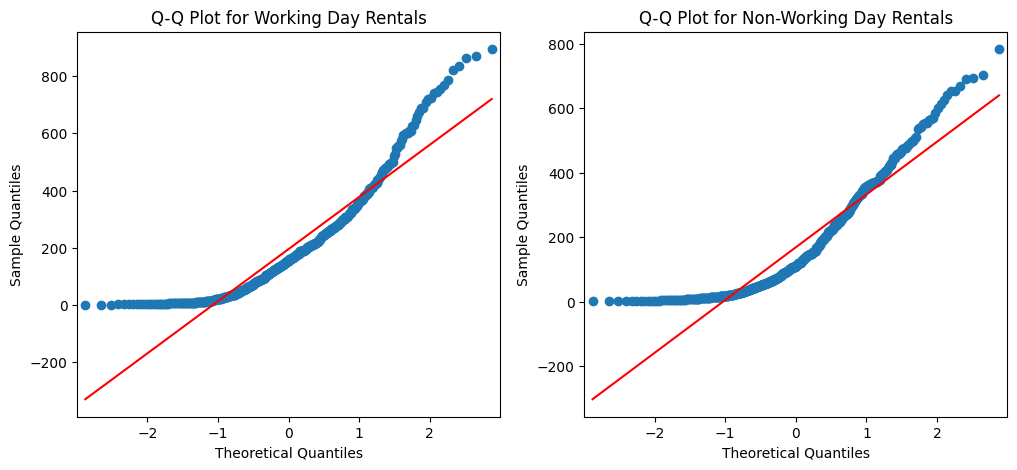

In [175]:
# Checking normality assumption
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sm.qqplot(working_day_rentals.sample(500, random_state=42), line='s', ax=ax[0])
ax[0].set_title("Q-Q Plot for Working Day Rentals")
sm.qqplot(non_working_day_rentals.sample(500, random_state=42), line='s', ax=ax[1])
ax[1].set_title("Q-Q Plot for Non-Working Day Rentals")
plt.show()

In [176]:
shapiro_working = shapiro(working_day_rentals.sample(500, random_state=42))
shapiro_non_working = shapiro(non_working_day_rentals.sample(500, random_state=42))
print(f"Shapiro-Wilk Test for Working Days: p-value={shapiro_working.pvalue}")
print(f"Shapiro-Wilk Test for Non-Working Days: p-value={shapiro_non_working.pvalue}")

Shapiro-Wilk Test for Working Days: p-value=8.020070098537695e-20
Shapiro-Wilk Test for Non-Working Days: p-value=3.4189745013780254e-20


In [177]:
# Checking equal variance assumption
levene_test = levene(working_day_rentals, non_working_day_rentals)
print(f"Levene's Test for Equal Variance: p-value={levene_test.pvalue:.4f}")

Levene's Test for Equal Variance: p-value=0.9438


In [178]:
# Performing t-test
t_stat, p_value = ttest_ind(working_day_rentals, non_working_day_rentals, equal_var=False)
print(f"T-Test Results: t-stat={t_stat:.4f}, p-value={p_value:.4f}")

T-Test Results: t-stat=1.2363, p-value=0.2164


1. Effect of Working Days on Bike Rentals

Ans: No difference in rentals between working and non-working days

In [179]:
## 2. ANOVA: Effect of Weather and Season on Bike Rentals
season_groups = [df[df['season'] == i]['count'] for i in range(1, 5)]
weather_groups = [df[df['weather'] == i]['count'] for i in range(1, 5)]

# H0: No difference in mean rentals across groups
# H1: At least one group differs

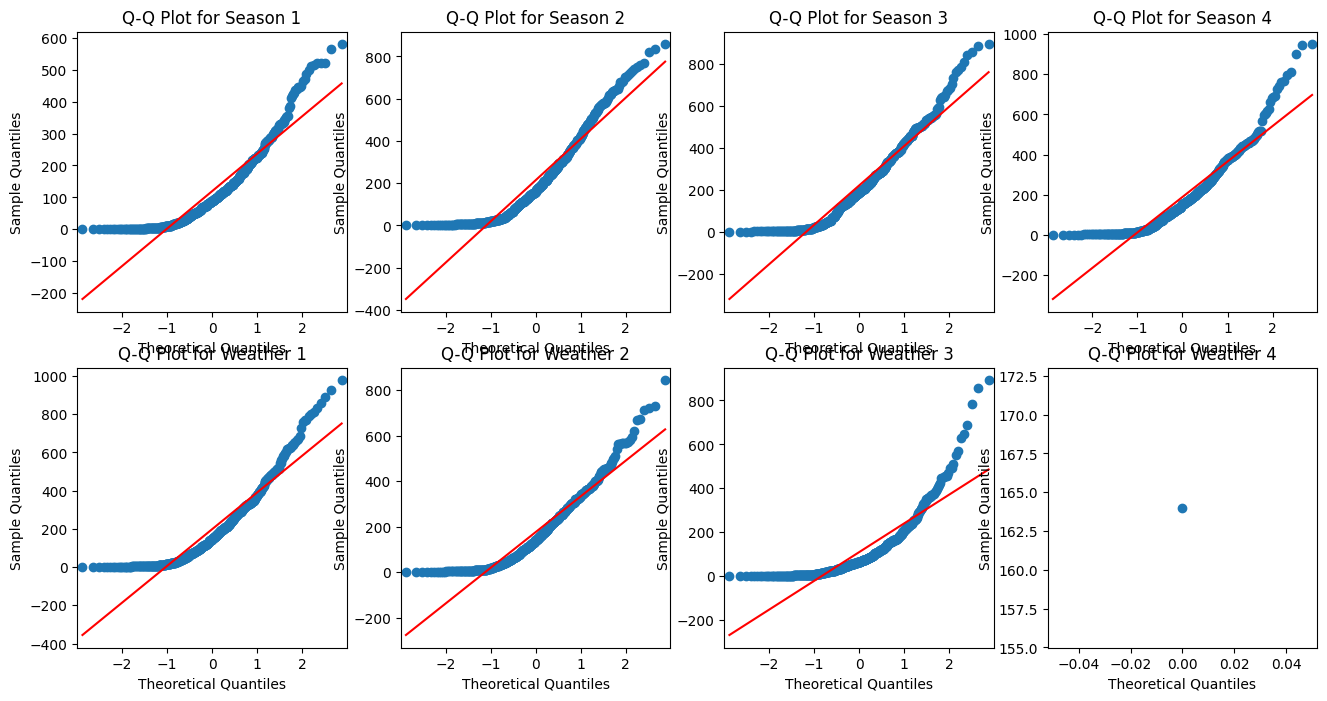

In [180]:
# Checking normality assumption with Q-Q Plots
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
for i in range(1, 5):
    # Sample size should be less than or equal to the population size for each group
    sample_size_season = min(500, len(df[df['season'] == i]))
    sample_size_weather = min(500, len(df[df['weather'] == i]))

    sm.qqplot(df[df['season'] == i]['count'].sample(sample_size_season, random_state=42), line='s', ax=axes[0, i-1])
    axes[0, i-1].set_title(f"Q-Q Plot for Season {i}")
    sm.qqplot(df[df['weather'] == i]['count'].sample(sample_size_weather, random_state=42), line='s', ax=axes[1, i-1])
    axes[1, i-1].set_title(f"Q-Q Plot for Weather {i}")
plt.show()

In [181]:
# ANOVA Test
anova_season = f_oneway(*season_groups)
anova_weather = f_oneway(*weather_groups)
print(f"ANOVA Results (Season): F-stat={anova_season.statistic:.4f}, p-value={anova_season.pvalue}")
print(f"ANOVA Results (Weather): F-stat={anova_weather.statistic:.4f}, p-value={anova_weather.pvalue}")

ANOVA Results (Season): F-stat=236.9467, p-value=6.164843386499654e-149
ANOVA Results (Weather): F-stat=65.5302, p-value=5.482069475935669e-42


In [182]:
# Kruskal Test
kruskal_season = kruskal(*season_groups)
kruskal_weather = kruskal(*weather_groups)
print(f"Kruskal Results (Season): F-stat={kruskal_season.statistic:.4f}, p-value={kruskal_season.pvalue}")
print(f"Kruskal Results (Weather): F-stat={kruskal_weather.statistic:.4f}, p-value={kruskal_weather.pvalue}")

Kruskal Results (Season): F-stat=699.6669, p-value=2.479008372608633e-151
Kruskal Results (Weather): F-stat=205.0022, p-value=3.501611300708679e-44


2. Effect of Weather and Season on Bike Rentals

Ans : Weather and Season effect bike rentals

In [183]:
## 3. Chi-square Test: Relationship between Weather and Season

# H0: Weather conditions and seasons are independent (i.e., there is no significant relationship between weather and season).
# H1: Weather conditions and seasons are dependent (i.e., there is a significant relationship between weather and season).

contingency_table = pd.crosstab(df['weather'], df['season'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test Results: chi2-stat={chi2_stat:.4f}, p-value={p_val}")

Chi-Square Test Results: chi2-stat=49.1587, p-value=1.5499250736864862e-07


3. Relationship between Weather and Season

Ans: Weather conditions and seasons are dependent (i.e., there is a significant relationship between weather and season)

In [184]:
## 4. Impact of humidity on bike rentals
# H0: Humidity has no significant effect on bike rentals
# H1: Humidity has a significant effect on bike rentals

anova_humidity = f_oneway(df[df['humidity'] < 30]['count'],
                          df[(df['humidity'] >= 30) & (df['humidity'] < 60)]['count'],
                          df[df['humidity'] >= 60]['count'])
print(f"ANOVA Results (Humidity): F-stat={anova_humidity.statistic:.4f}, p-value={anova_humidity.pvalue}")

ANOVA Results (Humidity): F-stat=413.8511, p-value=5.937758174682865e-174


4. Impact of humidity on bike rentals

Ans: Humidity has a significant effect on bike rentals

In [185]:
## 5. Effect of temperature on casual and registered users
# H0: There is no difference in temperature preference between casual and registered users
# H1: There is a significant difference in temperature preference between casual and registered users

# Define temperature categories
df['temp_category'] = pd.cut(df['temp'], bins=[df['temp'].min(), 15, 25, df['temp'].max()], labels=['Low', 'Medium', 'High'])

# Perform ANOVA test on casual and registered users across temperature categories
anova_temp_casual = f_oneway(df[df['temp_category'] == 'Low']['casual'],
                              df[df['temp_category'] == 'Medium']['casual'],
                              df[df['temp_category'] == 'High']['casual'])

anova_temp_registered = f_oneway(df[df['temp_category'] == 'Low']['registered'],
                                  df[df['temp_category'] == 'Medium']['registered'],
                                  df[df['temp_category'] == 'High']['registered'])

print(f"ANOVA Results (Temperature - Casual Users): F-stat={anova_temp_casual.statistic:.4f}, p-value={anova_temp_casual.pvalue}")
print(f"ANOVA Results (Temperature - Registered Users): F-stat={anova_temp_registered.statistic:.4f}, p-value={anova_temp_registered.pvalue}")

ANOVA Results (Temperature - Casual Users): F-stat=1250.5632, p-value=0.0
ANOVA Results (Temperature - Registered Users): F-stat=465.1690, p-value=1.4354523562749097e-194


5. Effect of temperature on casual and registered users

Ans: There is a significant difference in temperature preference between casual and registered users

In [186]:
## 6. Relationship between wind speed and bike rentals
# H0: Wind speed does not affect bike rentals
# H1: Wind speed has a significant effect on bike rentals

anova_windspeed = f_oneway(df[df['windspeed'] < 10]['count'],
                           df[(df['windspeed'] >= 10) & (df['windspeed'] < 20)]['count'],
                           df[df['windspeed'] >= 20]['count'])
print(f"ANOVA Results (Windspeed): F-stat={anova_windspeed.statistic:.4f}, p-value={anova_windspeed.pvalue}")

ANOVA Results (Windspeed): F-stat=83.2676, p-value=1.2919009062450584e-36


6. Relationship between wind speed and bike rentals

Ans: Wind speed has a significant effect on bike rentals

In [187]:
## 7. Variation in rentals across different months
# H0: There is no difference in bike rentals across different months
# H1: There is a significant difference in bike rentals across different months

month_groups = [df[df['month'] == i]['count'] for i in range(1, 13)]
anova_months = f_oneway(*month_groups)
print(f"ANOVA Results (Months): F-stat={anova_months.statistic:.4f}, p-value={anova_months.pvalue}")

ANOVA Results (Months): F-stat=78.4834, p-value=3.9670124592025475e-171


7. Variation in rentals across different months

Ans: There is a significant difference in bike rentals across different months

In [188]:
## 8. Influence of holidays on casual vs. registered users
# H0: The number of casual and registered users is the same on holidays and non-holidays
# H1: The number of casual and registered users differs on holidays

t_stat_holiday_cas, p_value_holiday_cas = ttest_ind(df[df['holiday'] == 1]['casual'], df[df['holiday'] == 0]['casual'], equal_var=False)
t_stat_holiday_reg, p_value_holiday_reg = ttest_ind(df[df['holiday'] == 1]['registered'], df[df['holiday'] == 0]['registered'], equal_var=False)
print(f"T-Test Results (Casual Users on Holiday vs Non-Holiday): t-stat={t_stat_holiday_cas:.4f}, p-value={p_value_holiday_cas}")
print(f"T-Test Results (Registered Users on Holiday vs Non-Holiday): t-stat={t_stat_holiday_reg:.4f}, p-value={p_value_holiday_reg}")

T-Test Results (Casual Users on Holiday vs Non-Holiday): t-stat=3.7323, p-value=0.00022429836461968826
T-Test Results (Registered Users on Holiday vs Non-Holiday): t-stat=-2.6708, p-value=0.007931643652645827


8. Influence of holidays on casual vs. registered users

Ans: The number of casual and registered users differs on holidays

### **Key Findings from Hypothesis Testing**  

1. **Effect of Working Days on Bike Rentals**  
   - The analysis indicates **no significant difference** in the number of rentals between working days and non-working days. This suggests that users rent bikes consistently, regardless of whether it is a weekday or a weekend.  

2. **Effect of Weather and Season on Bike Rentals**  
   - The results show that **both weather conditions and seasons significantly impact bike rentals**. Favorable weather conditions, such as clear skies, and seasons like summer and fall see higher rental activity, whereas extreme weather conditions (heavy rain or snow) lead to reduced usage for casual riders.  

3. **Relationship between Weather and Season**  
   - A strong **dependency exists between weather conditions and seasons**, meaning that certain weather patterns are more likely to occur in specific seasons. This correlation is important for predicting demand based on seasonal trends.  

4. **Impact of Humidity on Bike Rentals**  
   - The findings reveal that **humidity levels significantly influence bike rentals**. Moderate humidity levels (between 30% and 60%) are associated with higher rental activity, while extreme humidity (too low or too high) leads to lower demand.  

5. **Effect of Temperature on Casual and Registered Users**  
   - **Casual and registered users show different preferences for temperature ranges**. Casual users tend to rent bikes more frequently during moderate temperature conditions, whereas registered users exhibit a more consistent rental pattern across different temperature levels.  

6. **Relationship between Wind Speed and Bike Rentals**  
   - The analysis confirms that **wind speed significantly affects bike rentals**. Higher wind speeds tend to reduce the number of rentals, as strong winds may make cycling less convenient and comfortable.  

7. **Variation in Rentals Across Different Months**  
   - The results indicate **a significant difference in bike rentals across different months**. Rentals peak between April and October, suggesting a seasonal preference, possibly due to favorable weather and increased commuting needs.  

8. **Influence of Holidays on Casual vs. Registered Users**  
   - The study finds that **casual and registered users exhibit different rental behaviors on holidays**. Casual users tend to rent more on holidays, while registered users maintain a more consistent pattern throughout the year.  

These insights provide valuable guidance for optimizing Yulu's shared electric cycle services.